# PREDICTING CRIME RATE IN CHICAGO USING TIME SERIES





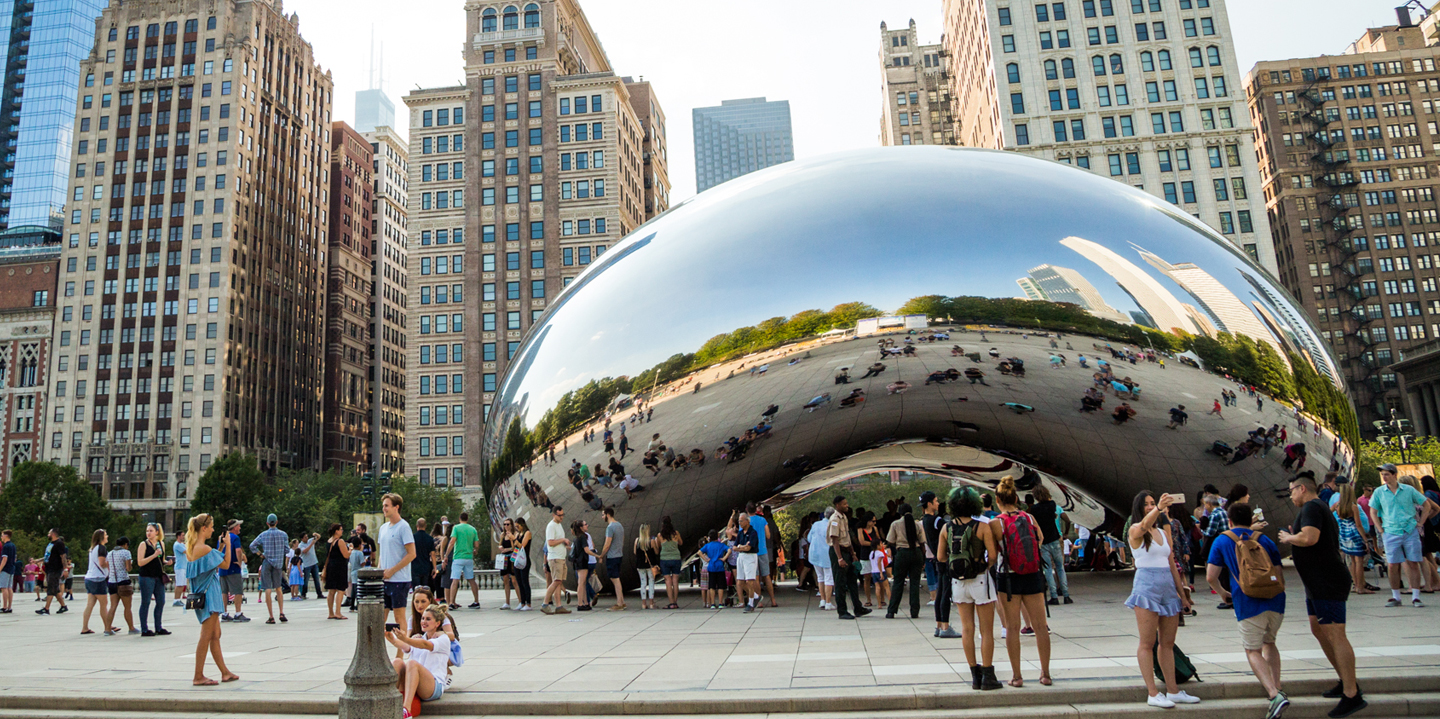

# PROBLEM STATEMENT

- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017.
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns:
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.
    - District: Indicates the police district where the incident occurred.
    - Ward: The ward (City Council district) where the incident occurred.
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas.
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

# STEP #1: IMPORTING DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet


In [ ]:
# dataframes creation for both training and testing datasets
chicago_df_1 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)


<ipython-input-3-9655ca95419b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_1 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
<ipython-input-3-9655ca95419b>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_1 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
<ipython-input-3-9655ca95419b>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_2 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
<ipython-input-3-9655ca95419b>:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_2 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=Fal

In [ ]:

chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)


# STEP #2: EXPLORING THE DATASET  

In [ ]:
# Let's view the head of the training dataset
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [ ]:
# Let's view the last elements in the training dataset
chicago_df.tail(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
68142,876667,9986699,HY176925,03/08/2015 11:40:00 PM,009XX E 62ND ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,...,20.0,42.0,14,1183589.0,1864096.0,2015.0,08/17/2015 03:03:40 PM,41.782267,-87.602453,"(41.782267227, -87.602453003)"
68143,876668,9986700,HY176932,03/08/2015 11:30:00 PM,047XX S PULASKI RD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,14.0,57.0,08B,1150490.0,1873005.0,2015.0,08/17/2015 03:03:40 PM,41.807423,-87.723572,"(41.807422809, -87.723572168)"
68144,876669,9986701,HY176930,03/09/2015 12:40:00 AM,058XX W 63RD ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,13.0,64.0,08B,1138402.0,1862174.0,2015.0,08/17/2015 03:03:40 PM,41.777927,-87.768169,"(41.777927449, -87.768169424)"
68145,876670,9986702,HY176872,03/08/2015 10:30:00 PM,083XX S CARPENTER ST,0554,ASSAULT,AGG PO HANDS NO/MIN INJURY,STREET,True,...,21.0,71.0,08A,1170770.0,1849478.0,2015.0,08/17/2015 03:03:40 PM,41.742443,-87.649877,"(41.742442975, -87.649876599)"
68146,876671,9986703,HY176956,03/09/2015 02:00:00 AM,079XX S JUSTINE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,21.0,71.0,14,1167389.0,1851929.0,2015.0,08/17/2015 03:03:40 PM,41.749242,-87.662195,"(41.749241885, -87.662194572)"
68147,876672,9986704,HY176953,03/09/2015 01:37:00 AM,074XX S PARNELL AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,...,17.0,68.0,15,1173836.0,1855526.0,2015.0,08/17/2015 03:03:40 PM,41.758972,-87.638464,"(41.758972076, -87.638463818)"
68148,876673,9986705,HY176861,03/08/2015 10:33:00 PM,064XX S HONORE ST,051A,ASSAULT,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,67.0,04A,1165122.0,1861880.0,2015.0,08/17/2015 03:03:40 PM,41.776597,-87.670221,"(41.776597025, -87.670220675)"
68149,876674,9986706,HY176959,03/08/2015 10:00:00 PM,010XX E 82ND ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,8.0,44.0,14,1184516.0,1850834.0,2015.0,08/17/2015 03:03:40 PM,41.745853,-87.599469,"(41.745853357, -87.59946923)"
68150,876675,9986708,HY176921,03/09/2015 12:20:00 AM,093XX S WOODLAWN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,8.0,47.0,08B,1185839.0,1843279.0,2015.0,08/17/2015 03:03:40 PM,41.725091,-87.594859,"(41.725090566, -87.594859084)"
68151,876676,9986709,HY176941,03/09/2015 01:10:00 AM,069XX S MAPLEWOOD AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE PORCH/HALLWAY,True,...,18.0,66.0,26,1160575.0,1858451.0,2015.0,08/17/2015 03:03:40 PM,41.767282,-87.686984,"(41.767282365, -87.686984316)"


<Axes: >

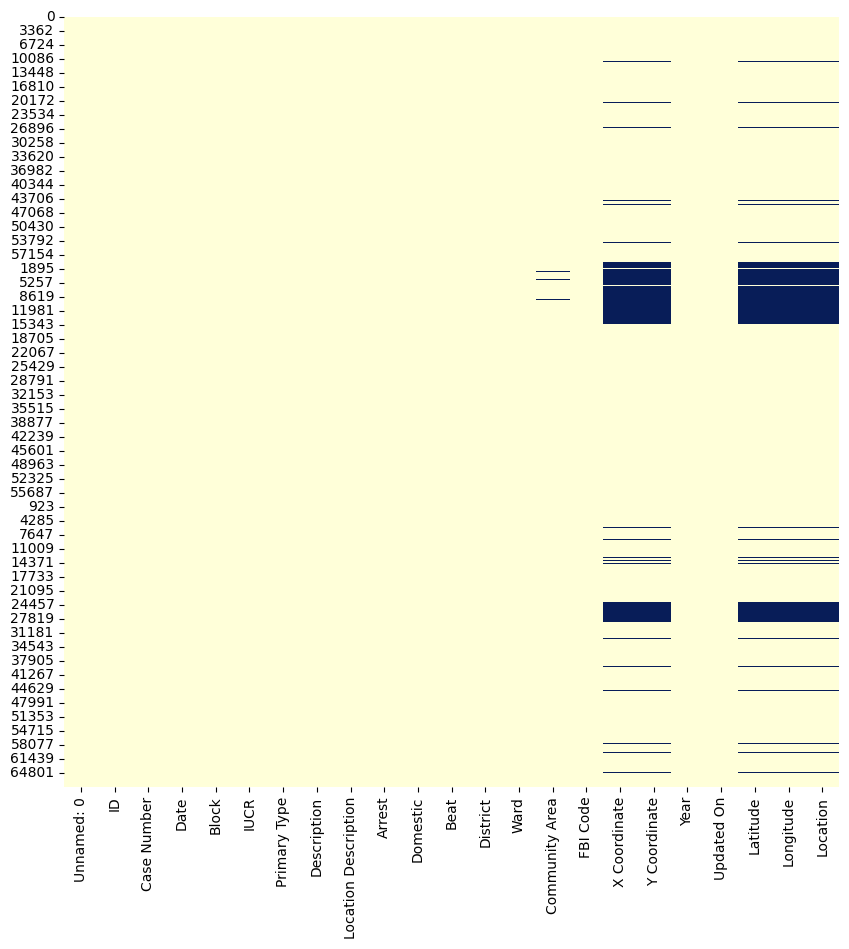

In [ ]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [ ]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
68157,9986717,03/08/2015 09:39:00 PM,050XX W CHICAGO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False
68158,9986718,03/08/2015 11:42:00 PM,015XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
68159,9986720,03/09/2015 02:46:00 AM,051XX W ALTGELD ST,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False
68160,9986722,03/09/2015 02:40:00 AM,058XX N GLENWOOD AVE,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False


In [ ]:
# Assembling a datetime by rearranging the dataframe column "Date".

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
68157,9986717,2015-03-08 21:39:00,050XX W CHICAGO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False
68158,9986718,2015-03-08 23:42:00,015XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
68159,9986720,2015-03-09 02:46:00,051XX W ALTGELD ST,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False
68160,9986722,2015-03-09 02:40:00,058XX N GLENWOOD AVE,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False


In [ ]:
# setting the index to be the date
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)


In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2015-03-08 21:39:00,9986717,2015-03-08 21:39:00,050XX W CHICAGO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False
2015-03-08 23:42:00,9986718,2015-03-08 23:42:00,015XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
2015-03-09 02:46:00,9986720,2015-03-09 02:46:00,051XX W ALTGELD ST,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False


In [ ]:
chicago_df['Primary Type'].value_counts()

THEFT                                37862
BATTERY                              33700
CRIMINAL DAMAGE                      20728
NARCOTICS                            20607
OTHER OFFENSE                        12253
ASSAULT                              11470
BURGLARY                              9364
DECEPTIVE PRACTICE                    8705
MOTOR VEHICLE THEFT                   7890
ROBBERY                               6490
CRIMINAL TRESPASS                     5330
PROSTITUTION                          1949
WEAPONS VIOLATION                     1886
OFFENSE INVOLVING CHILDREN            1639
PUBLIC PEACE VIOLATION                1281
CRIM SEXUAL ASSAULT                    945
SEX OFFENSE                            743
INTERFERENCE WITH PUBLIC OFFICER       494
HOMICIDE                               403
LIQUOR LAW VIOLATION                   319
ARSON                                  285
GAMBLING                               168
KIDNAPPING                             162
STALKING   

In [ ]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         37862
BATTERY                       33700
CRIMINAL DAMAGE               20728
NARCOTICS                     20607
OTHER OFFENSE                 12253
ASSAULT                       11470
BURGLARY                       9364
DECEPTIVE PRACTICE             8705
MOTOR VEHICLE THEFT            7890
ROBBERY                        6490
CRIMINAL TRESPASS              5330
PROSTITUTION                   1949
WEAPONS VIOLATION              1886
OFFENSE INVOLVING CHILDREN     1639
PUBLIC PEACE VIOLATION         1281
Name: Primary Type, dtype: int64

In [ ]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'ROBBERY', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'WEAPONS VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION'],
      dtype='object')

<Axes: xlabel='count', ylabel='Primary Type'>

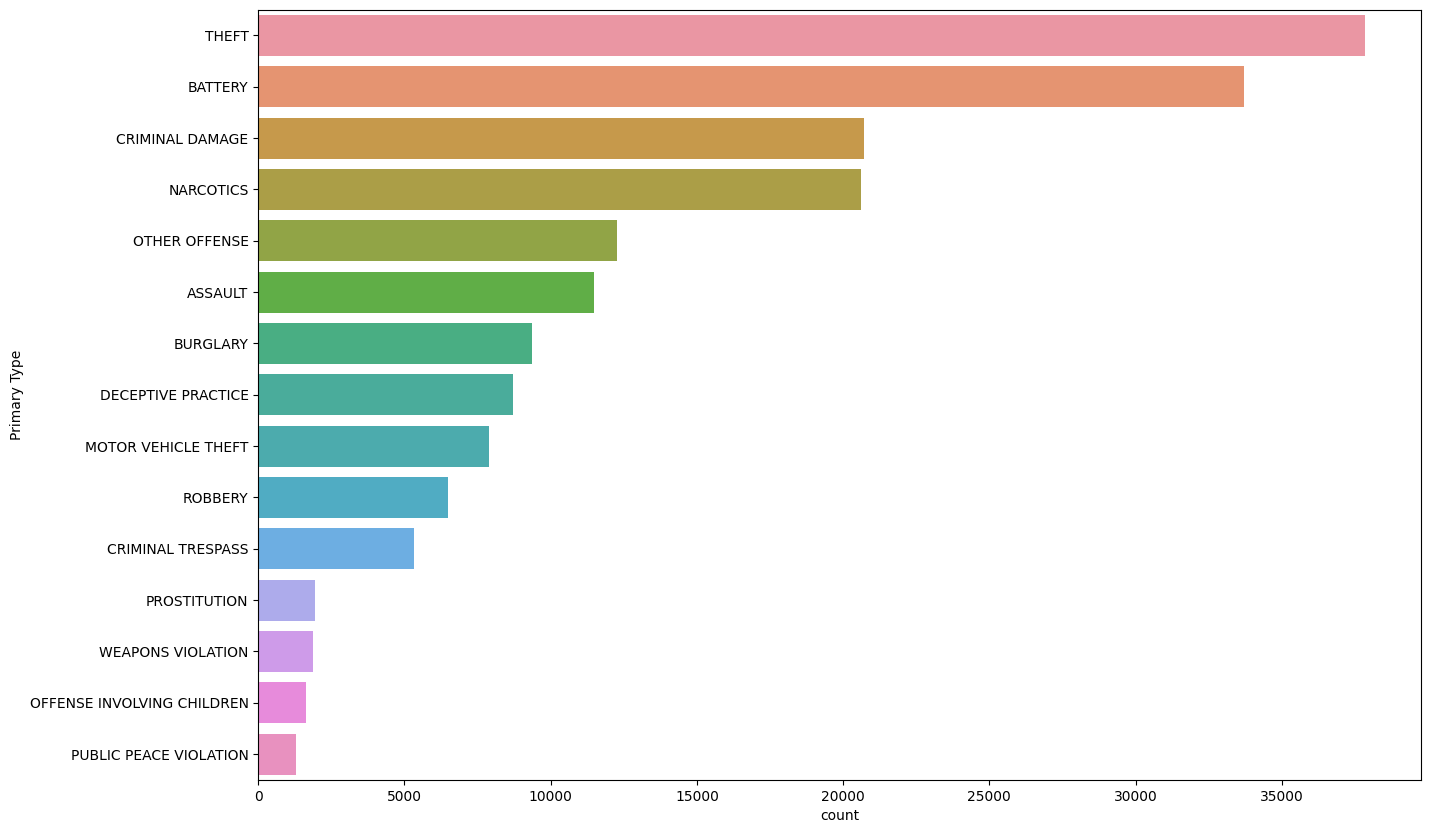

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

<Axes: xlabel='count', ylabel='Location Description'>

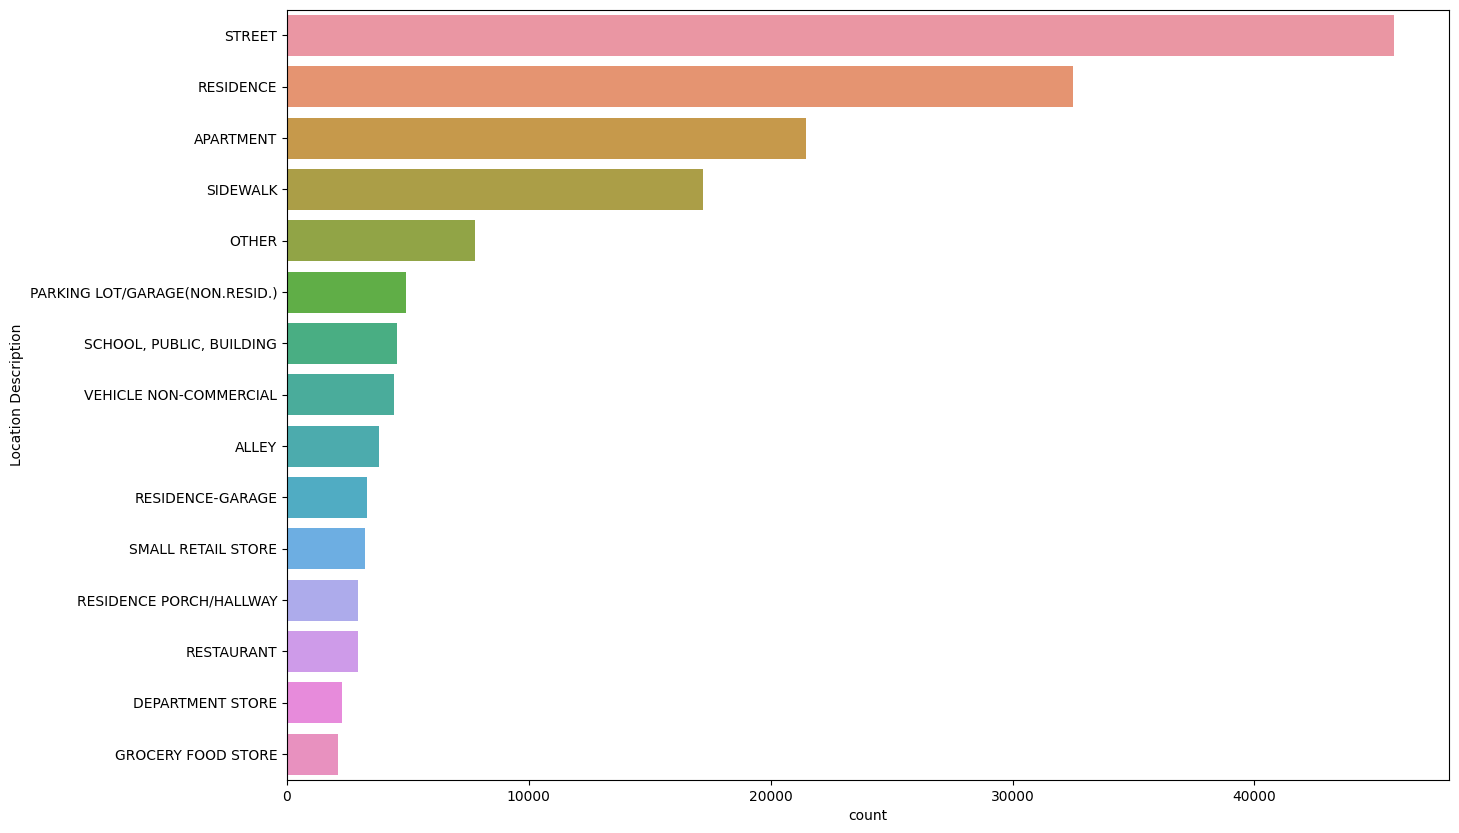

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [ ]:
chicago_df.resample('Y').size()

Date
2005-12-31      938
2006-12-31    57682
2007-12-31        0
2008-12-31    49876
2009-12-31     6222
2010-12-31     1493
2011-12-31      535
2012-12-31      674
2013-12-31     1934
2014-12-31     3089
2015-12-31    40152
2016-12-31    22313
dtype: int64

Text(0, 0.5, 'Number of Crimes')

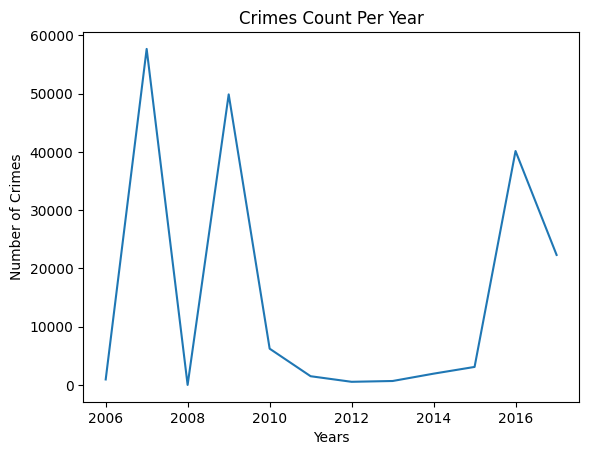

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [ ]:
chicago_df.resample('M').size()

Date
2005-01-31       52
2005-02-28       29
2005-03-31       26
2005-04-30       38
2005-05-31       42
              ...  
2016-01-31       82
2016-02-29      123
2016-03-31      213
2016-04-30     1663
2016-05-31    20232
Length: 137, dtype: int64

Text(0, 0.5, 'Number of Crimes')

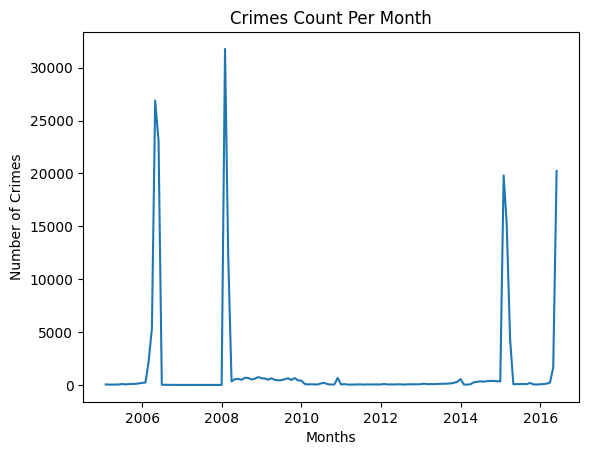

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [ ]:
chicago_df.resample('Q').size()

Date
2005-03-31      107
2005-06-30      169
2005-09-30      228
2005-12-31      434
2006-03-31     7685
2006-06-30    49987
2006-09-30        9
2006-12-31        1
2007-03-31        0
2007-06-30        0
2007-09-30        0
2007-12-31        0
2008-03-31    44476
2008-06-30     1591
2008-09-30     1841
2008-12-31     1968
2009-03-31     1720
2009-06-30     1369
2009-09-30     1632
2009-12-31     1501
2010-03-31      205
2010-06-30      237
2010-09-30      291
2010-12-31      760
2011-03-31      145
2011-06-30      134
2011-09-30      120
2011-12-31      136
2012-03-31      186
2012-06-30      148
2012-09-30      149
2012-12-31      191
2013-03-31      279
2013-06-30      266
2013-09-30      361
2013-12-31     1028
2014-03-31      120
2014-06-30      873
2014-09-30     1033
2014-12-31     1063
2015-03-31    39433
2015-06-30      221
2015-09-30      350
2015-12-31      148
2016-03-31      418
2016-06-30    21895
dtype: int64

Text(0, 0.5, 'Number of Crimes')

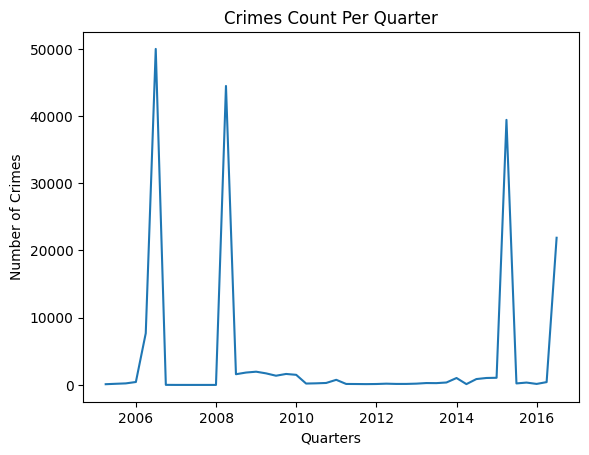

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [ ]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [ ]:
chicago_prophet

,Date,0
0,2005-01-31,52
1,2005-02-28,29
2,2005-03-31,26
3,2005-04-30,38
4,2005-05-31,42
...,...,...
132,2016-01-31,82
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [ ]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [ ]:
chicago_prophet

In [ ]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [ ]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,52
1,2005-02-28,29
2,2005-03-31,26
3,2005-04-30,38
4,2005-05-31,42
...,...,...
132,2016-01-31,82
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


# STEP #4: MAKE PREDICTIONS

In [ ]:
chicago_prophet_df.columns

In [ ]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [ ]:
chicago_prophet_df_final

In [34]:
m = Prophet()
m.fit(chicago_prophet_df_final)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71h9r0sj/gl983man.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71h9r0sj/9bhszrdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54580', 'data', 'file=/tmp/tmp71h9r0sj/gl983man.json', 'init=/tmp/tmp71h9r0sj/9bhszrdf.json', 'output', 'file=/tmp/tmp71h9r0sj/prophet_modelqy3bx6ec/prophet_model-20230710123635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [36]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,2101.020195,-1116.437567,10208.263167,2101.020195,2101.020195,2241.335746,2241.335746,2241.335746,2241.335746,2241.335746,2241.335746,0.0,0.0,0.0,4342.355941
1,2005-02-28,2092.811369,-2698.732014,9024.808603,2092.811369,2092.811369,1185.363149,1185.363149,1185.363149,1185.363149,1185.363149,1185.363149,0.0,0.0,0.0,3278.174518
2,2005-03-31,2083.723025,-4504.274520,7231.646771,2083.723025,2083.723025,-535.934937,-535.934937,-535.934937,-535.934937,-535.934937,-535.934937,0.0,0.0,0.0,1547.788088
3,2005-04-30,2074.927854,-2340.264832,8562.920791,2074.927854,2074.927854,993.262396,993.262396,993.262396,993.262396,993.262396,993.262396,0.0,0.0,0.0,3068.190250
4,2005-05-31,2065.839511,-1149.432512,10353.672049,2065.839511,2065.839511,2382.929298,2382.929298,2382.929298,2382.929298,2382.929298,2382.929298,0.0,0.0,0.0,4448.768809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2017-05-27,783.122703,-5833.222620,6107.054867,783.114186,783.130001,-838.254399,-838.254399,-838.254399,-838.254399,-838.254399,-838.254399,0.0,0.0,0.0,-55.131696
498,2017-05-28,782.829999,-4399.350015,6730.395532,782.821432,782.837331,-62.772616,-62.772616,-62.772616,-62.772616,-62.772616,-62.772616,0.0,0.0,0.0,720.057383
499,2017-05-29,782.537295,-4441.236865,7782.622476,782.528678,782.544660,741.183043,741.183043,741.183043,741.183043,741.183043,741.183043,0.0,0.0,0.0,1523.720338
500,2017-05-30,782.244591,-3633.473768,7875.458047,782.235927,782.251990,1560.874296,1560.874296,1560.874296,1560.874296,1560.874296,1560.874296,0.0,0.0,0.0,2343.118887


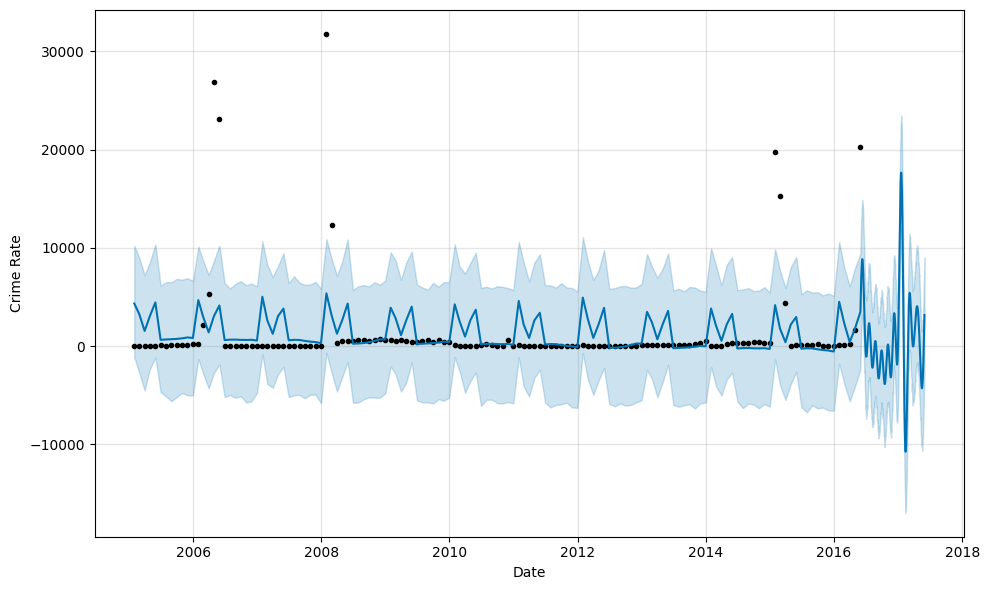

In [37]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

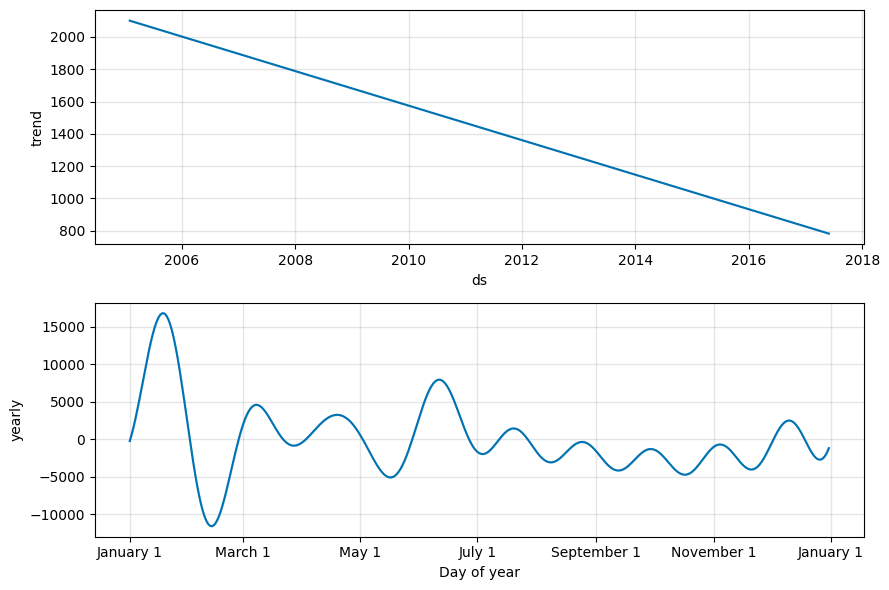

In [38]:
figure3 = m.plot_components(forecast)